In [1]:
require(ggplot2)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [2]:
BASE.PATH <- './output/mult'

result <- NULL

for (d in list.files(BASE.PATH)) {
    
    if (grepl('GSE', d)) {
        
        path <- paste(BASE.PATH, d, 'complexity', sep='/')
        
        i <- 1
        
        means <- list()
        
        values <- c()
        
        for (f in sort(list.files(path))) {
            
            if (grepl('cmp_', f)) {
                
                filename <- paste(path, f, sep='/')
                
                print(filename)
                
                df <- read.table(filename, sep=',', header=T)
                
                colnames(df) <- c('metric', 'round_0', 'round_1', 'round_2')
                
                m <- apply(df[,2:4], 1, mean)
                
                m[is.na(m)] <- 0
                
                df$source <- f
                
                df$database <- d
        
                r <- data.frame(database=d, source=f, value=m, metric=df$metric)

                if (is.null(result)) {
                    result <- r
                } else {
                    result <- rbind(result, r)
                }
                
            }
        }
    }
}

result <- result[order(result[,1], result[,4]), ]

head(result)

[1] "./output/mult/GSE135820/complexity/cmp_feature_extraction_GSE135820.csv"
[1] "./output/mult/GSE135820/complexity/cmp_no_feature_extraction_GSE135820.csv"
[1] "./output/mult/GSE68465/complexity/cmp_feature_extraction_GSE68465.csv"
[1] "./output/mult/GSE68465/complexity/cmp_no_feature_extraction_GSE68465.csv"
[1] "./output/mult/GSE94873/complexity/cmp_feature_extraction_GSE94873.csv"
[1] "./output/mult/GSE94873/complexity/cmp_no_feature_extraction_GSE94873.csv"


,database,source,value,metric
,<fct>,<fct>,<dbl>,<fct>
13,GSE135820,cmp_feature_extraction_GSE135820.csv,0.6978109,ft_c1
35,GSE135820,cmp_no_feature_extraction_GSE135820.csv,0.6978109,ft_c1
14,GSE135820,cmp_feature_extraction_GSE135820.csv,0.5598403,ft_c2
36,GSE135820,cmp_no_feature_extraction_GSE135820.csv,0.5598403,ft_c2
21,GSE135820,cmp_feature_extraction_GSE135820.csv,0.9391346,ft_cls_coef
43,GSE135820,cmp_no_feature_extraction_GSE135820.csv,0.9550651,ft_cls_coef


In [3]:
print(nrow(result))

diff_func <- function(x1, x2) {
    
    if (x1 == x2) {
      return(0)  
    } else if (x1 > x2) {
        return((1 - x2 / x1))
    } else {
        return(-(1 - x1 / x2))
    }   
}

f <- NULL

for (i in seq(1, nrow(result), by=2)) {
    
    r1 <- result[i,]

    r2 <- result[i + 1,]

    d <- data.frame(database=r1$database, metric=r1$metric, f=r1$value, nf=r2$value, diff=diff_func(r1$value, r2$value))
    
    if (is.null(f)) {
        f <- d
    } else {
        f <- rbind(f, d)
    }
}

f[is.na(f)] <- 0

write.csv(f, 'output/complexity_comparison.csv', row.names=F)

head(f)

[1] 132


,database,metric,f,nf,diff
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,GSE135820,ft_c1,0.6978109,0.6978109,0.0000000000
2,GSE135820,ft_c2,0.5598403,0.5598403,0.0000000000
3,GSE135820,ft_cls_coef,0.9391346,0.9550651,-0.0166799815
4,GSE135820,ft_density,0.9999741,0.9071181,0.0928584317
5,GSE135820,ft_f1,0.9947492,0.9948785,-0.0001299515
6,GSE135820,ft_f1v,0.3204884,0.3617208,-0.1139895385


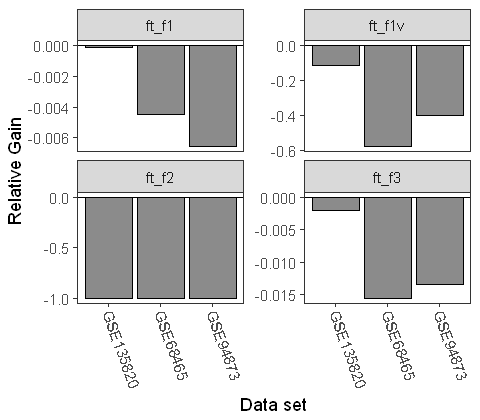

In [28]:
require(ggplot2)

f <- f[f$metric != 'ft_c1',]
f <- f[f$metric != 'ft_c2',]

f <- f[f$metric != 'ft_density',]
f <- f[f$metric != 'ft_cls_coef',]
f <- f[f$metric != 'ft_hubs',]
f <- f[f$metric != 'ft_lsc',]

f <- f[f$metric != 'ft_n1',]
f <- f[f$metric != 'ft_n2',]
f <- f[f$metric != 'ft_n3',]
f <- f[f$metric != 'ft_n4',]

f <- f[f$metric != 'ft_t1',]
f <- f[f$metric != 'ft_t2',]
f <- f[f$metric != 'ft_t3',]
f <- f[f$metric != 'ft_t4',]

f_ <- f[f$metric %in% c('ft_f1', 'ft_f1v', 'ft_f2', 'ft_f3'),]

p <- ggplot(f_) + geom_bar(stat='identity', aes(database, diff), alpha=.70, colour='black') + 
        facet_wrap(metric ~ ., ncol=2, scales='free_y') + 
        geom_hline(yintercept = 0) + 
        theme_bw() +
        scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
        # scale_fill_discrete(name='Dataset') + 
        xlab('Data set') +
        ylab('Relative Gain') +
        theme(
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              axis.text.x = element_text(angle = -70, vjust = 0.5, hjust=0)
             )

options(repr.plot.width=4, repr.plot.height=3.5)

ggsave('images/complexity.pdf', p, units='cm', width=9, height=8.5)

p